# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

## imports for Python, Pandas

In [16]:
import pandas as pd
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [24]:
# load json as string
json_data = json.load((open('data/world_bank_projects.json')))
json_data[1]

{'sector': [{'Name': 'Public administration- Other social services'},
  {'Name': 'General public administration sector'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'OTHER',
 'prodline': 'RE',
 'mjtheme': ['Economic management', 'Social protection and risk management'],
 'idacommamt': 0,
 'impagency': 'MINISTRY OF FINANCE',
 'project_name': 'TN: DTF Social Protection Reforms Support',
 'mjthemecode': '1,6',
 'totalcommamt': 4700000,
 'id': 'P144674',
 'mjsector_namecode': [{'code': 'BX',
   'name': 'Public Administration, Law, and Justice'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}],
 'docty': 'Project Information Document,Integrated Safeguards Data Sheet,Integrated Safeguards Data Sheet,Project Information Document,Integrated Safeguards Data Sheet,Project Information Document',
 'sector1': {'Percent': 70,
  'Name': 'Public administration- Other social services'},
 'lendinginstr': 'Specific Investment Loan',
 'countrycode': 'TN',
 'sector2': {'Pe

In [28]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [7]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Answer to Q1

In [20]:
# select top ten countries with most projects
json_df['countryshortname'].value_counts().head(10)

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

### Answer to Q2

In [110]:
# normalize mjtheme_namecode and project id from the json file 
json_df_ltd = json_normalize(json_data, 'mjtheme_namecode', ['id'])
json_df_ltd.head()

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310


In [111]:
# top 10 major project themes
json_df_ltd['name'].value_counts()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

### Answer to Question 3

In [113]:
# extract unique values of code and name from the dataset
mjthemes = json_df_ltd.groupby(['code','name']).size().reset_index()
mjthemes.head(6)

,code,name,0
0,1,,5
1,1,Economic management,33
2,10,,14
3,10,Rural development,202
4,11,,27
5,11,Environment and natural resources management,223


In [114]:
# retain codes that have non-empty names
mjthemes['length'] = mjthemes['name'].apply(lambda x: len(x))
mjthemes = mjthemes[mjthemes['length']!=0].drop([0,'length'], axis=1)

mjthemes = mjthemes.set_index('code').reset_index()
mjthemes

,code,name
0,1,Economic management
1,10,Rural development
2,11,Environment and natural resources management
3,2,Public sector governance
4,3,Rule of law
5,4,Financial and private sector development
6,5,Trade and integration
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,8,Human development


In [117]:
# merge original dataframe and mjthemes

json_df_cleaned = pd.merge(json_df_ltd, mjthemes, on='code').drop('name_x', axis=1)
json_df_cleaned.head()

,code,id,name_y
0,8,P129828,Human development
1,8,P127033,Human development
2,8,P132616,Human development
3,8,P146271,Human development
4,8,P146271,Human development


In [127]:
# top 10 major project themes, with no missing values
json_df_cleaned['name_y'].value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name_y, dtype: int64

### Bonus

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

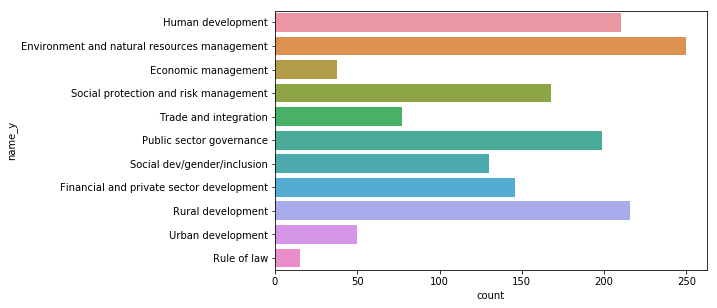

In [161]:
fig = plt.figure()
ax1 = fig.add_axes([0.0, 0.9, 1, 0.9])
sns.countplot(y=json_df_cleaned['name_y'])